## Observations and Insights


Overall, it is clear that Capomulin is a viable drug regimen to reduce tumor growth.
Capomulin had the most number of mice complete the study, with the exception of Remicane, all other regimens observed a number of mice deaths across the duration of the study.
There is a strong correlation between mouse weight and tumor volume
There was one potential outlier within the Infubinol regimen

## Dependencies and starter code

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import random
from scipy.stats import linregress

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
study_data_combined = pd.merge(study_results, mouse_metadata, how="left", on="Mouse ID")
study_data_combined.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


## Summary statistics

In [2]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
#sd=study_data_combined
group_sd= study_data_combined.groupby("Drug Regimen")["Tumor Volume (mm3)"]
group_sd.head()


pd.DataFrame({
    "mean":group_sd.mean(),
    "median":group_sd.median(),
    "variance":group_sd.var(),
    "std":group_sd.std(),
    "sem":group_sd.sem()
})

,mean,median,variance,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar plots

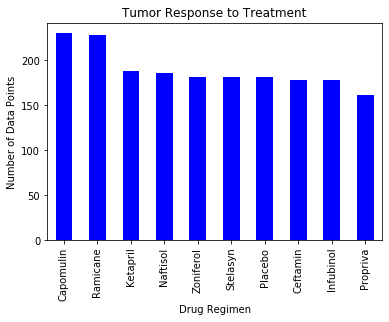

In [8]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
treatment_reg = study_data_combined["Drug Regimen"].value_counts()
treatment_bar_graph = treatment_reg.plot(kind="bar", facecolor="blue")

plt.title('Tumor Response to Treatment')
plt.xticks(rotation=90)
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Data Points')
plt.show()

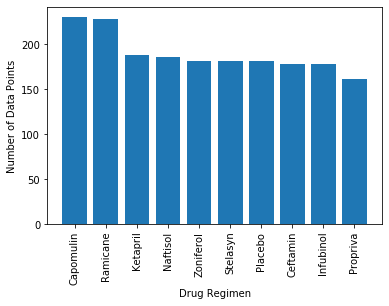

<Figure size 432x288 with 0 Axes>

In [13]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot


treatment_reg = study_data_combined["Drug Regimen"].value_counts()
treatment_reg_plt_chart = plt.bar(treatment_reg.index.values,treatment_reg.values)


plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")
plt.xticks(rotation=90)
plt.show()
plt.tight_layout()




## Pie plots

In [190]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_count = pd.DataFrame(study_data_combined["Sex"].value_counts())
gender_count

,Sex
Male,958
Female,935


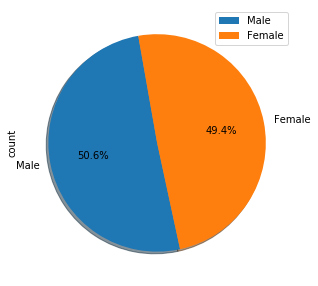

In [191]:

gender_df = pd.DataFrame({'count':[958, 935]},
                   index = ['Male', 'Female'])
gender_pie = gender_df.plot.pie(y='count', figsize=(5, 5),autopct="%1.1f%%", shadow=True, startangle=100)

([<matplotlib.patches.Wedge at 0x1d1aaa3f388>,
 [Text(-0.6908564105755949, -0.8559891471079557, 'Male'),
  Text(0.690856410575595, 0.8559891471079556, 'Female')],
 [Text(-0.37683076940486987, -0.46690317114979396, '50.6%'),
  Text(0.3768307694048699, 0.46690317114979385, '49.4%')])

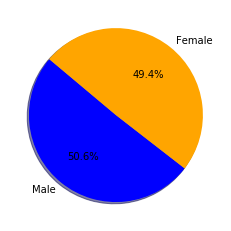

In [192]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# Labels for the sections of our pie chart
labels = ["Male", "Female"]

# The values of each section of the pie chart
sizes = [958,935]

# The colors of each section of the pie chart
colors = ["blue", "orange"]

# Tells matplotlib to seperate the "Humans" section from the others
explode = ( 0, 0)

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)







## Quartiles, outliers and boxplots

In [16]:

# Start by getting the last (greatest) timepoint for each mouse
max_tumor = study_data_combined.groupby(["Mouse ID"]).max()
max_tumor = max_tumor.reset_index()
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
combined_data = max_tumor[['Mouse ID','Timepoint']].merge(study_data_combined,on=['Mouse ID','Timepoint'],how="left")

capomulin = combined_data.loc[combined_data["Drug Regimen"] == "Capomulin"]['Tumor Volume (mm3)']
ramicane = combined_data.loc[combined_data["Drug Regimen"] == "Ramicane"]['Tumor Volume (mm3)']
infubinol = combined_data.loc[combined_data["Drug Regimen"] == "Infubinol"]['Tumor Volume (mm3)']
ceftamin = combined_data.loc[combined_data["Drug Regimen"] == "Ceftamin"]['Tumor Volume (mm3)']

# Quantitatively determine capomulin outliers
capo_quartiles = capomulin.quantile([.25,.5,.75])
capo_lowerq = capo_quartiles[0.25]
capo_upperq = capo_quartiles[0.75]
capo_iqr = capo_upperq-capo_lowerq
capo_lower_bound = capo_lowerq - (1.5*cap_iqr)
capo_upper_bound = capo_upperq + (1.5*cap_iqr)
print(f"Capomulin potential outliers: {capomulin.loc[(capomulin < capo_lower_bound) | (capomulin > capo_upper_bound)]}")

Capomulin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


In [17]:
# Quantitatively determine ramicane outliers
rami_quartiles = ramicane.quantile([.25,.5,.75])
rami_lowerq = rami_quartiles[0.25]
rami_upperq = rami_quartiles[0.75]
rami_iqr = rami_upperq-rami_lowerq
rami_lower_bound = rami_lowerq - (1.5*rami_iqr)
rami_upper_bound = rami_upperq + (1.5*rami_iqr)
print(f"Ramicane potential outliers: {ramicane.loc[(ramicane < rami_lower_bound) | (ramicane > rami_upper_bound)]}")

Ramicane potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


In [18]:
# Quantitatively determine infubinol outliers
infu_quartiles = infubinol.quantile([.25,.5,.75])
infu_lowerq = infu_quartiles[0.25]
infu_upperq = infu_quartiles[0.75]
infu_iqr = infu_upperq-infu_lowerq
infu_lower_bound = infu_lowerq - (1.5*infu_iqr)
infu_upper_bound = infu_upperq + (1.5*infu_iqr)
print(f"Infubinol potential outliers: {infubinol.loc[(infubinol < infu_lower_bound) | (infubinol > infu_upper_bound)]}")

Infubinol potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64


In [19]:
# Quantitatively determine ceftamin outliers
ceft_quartiles = ceftamin.quantile([.25,.5,.75])
ceft_lowerq = ceft_quartiles[0.25]
ceft_upperq = ceft_quartiles[0.75]
ceft_iqr = ceft_upperq-ceft_lowerq
ceft_lower_bound = ceft_lowerq - (1.5*ceft_iqr)
ceft_upper_bound = ceft_upperq + (1.5*ceft_iqr)
print(f"Ceftamin potential outliers: {ceftamin.loc[(ceftamin < ceft_lower_bound) | (ceftamin > ceft_upper_bound)]}")

Ceftamin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


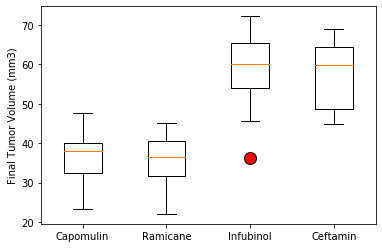

In [20]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
orange_out = dict(markerfacecolor='red',markersize=12)
plt.boxplot([capomulin,ramicane,infubinol,ceftamin],labels=['Capomulin','Ramicane','Infubinol','Ceftamin'],flierprops=orange_out)
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()

## Line and scatter plots

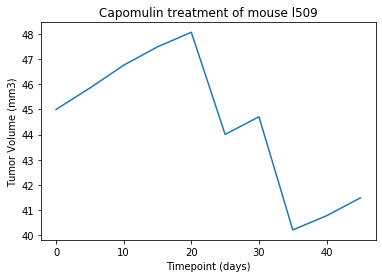

In [21]:


cap_table=study_data_combined.loc[study_data_combined["Drug Regimen"]=="Capomulin"]
id_l509=cap_table.loc[cap_table["Mouse ID"]=="l509"]
plt.plot(id_l509["Timepoint"],id_l509["Tumor Volume (mm3)"])
plt.title("Capomulin treatment of mouse l509")
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Timepoint (days)")
#plt.savefig("Charts/Mouse_l509_Capomulin_Treatment.png")
plt.show()


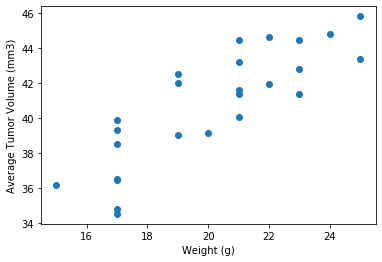

In [22]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

cap_table=study_data_combined.loc[study_data_combined["Drug Regimen"]=="Capomulin"]
cap_average = cap_table.groupby(['Mouse ID']).mean()
plt.scatter(cap_average['Weight (g)'],cap_average['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

The correlation between mouse weight and the average tumor volume is 0.84


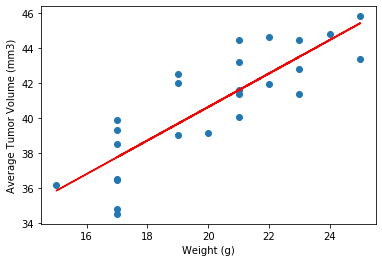

In [24]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
corr=round(st.pearsonr(cap_average['Weight (g)'],cap_average['Tumor Volume (mm3)'])[0],2)
print(f"The correlation between mouse weight and the average tumor volume is {corr}")
model = st.linregress(cap_average['Weight (g)'],cap_average['Tumor Volume (mm3)'])
y_values = cap_average['Weight (g)']*model[0]+model[1]
plt.scatter(cap_average['Weight (g)'],cap_average['Tumor Volume (mm3)'])
plt.plot(cap_average['Weight (g)'],y_values,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()